# Benchmark IA detection : ESCA / HEALTHY
### Epitech Voltron Project : Green Case

Notre objectif dans ce projet est d'aider les vignerons indépendants à prendre soin de leurs vignes.
Une des solutions que nous avons choisi pour aider les vignerons est de développer une IA permettant de detecter à l'aide de photo si une vigne est atteinte de la maladie *ESCA* ou si elle est saine.

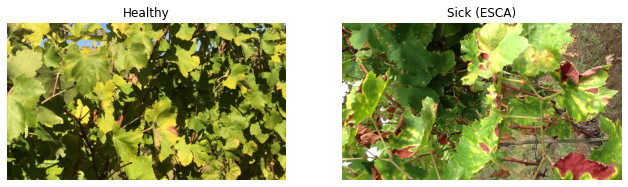

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 11 ,8

# read images
img_A = mpimg.imread('./dataset_original/healthy/healthy_001_cam3.jpg')
img_B = mpimg.imread('./dataset_original/esca/esca_000_cam1.jpg')
# display images
fig, ax = plt.subplots(1,2)
ax.flat[0].set_title("Healthy")
ax.flat[0].axis('off')
ax.flat[1].set_title("Sick (ESCA)")
ax.flat[1].axis('off')
ax[0].imshow(img_A)
ax[1].imshow(img_B)
plt.show()

Visuellement, on peut déjà observer que les vignes atteintent de l'ESCA ont des tâches rouges sur les feuilles.
Notre modèle d'intelligence artificiel a été entrainé sur des image réduites à la taille 320 * 180 afin de réduire au maximum la taille de notre modèle et son temps d'exécution, tout en gardant un maximum de données.
Un premier modèle avait été créé, mais prenait des images de taille 80 * 45, trop petites pour garder assez de données, bien que le modèle était deux fois plus léger.

In [2]:
import os
# get the size of file
size = os.path.getsize('model_medium_b32.h5') 
print('Size of model_medium_b32.h5 is', size, 'bytes')
size = os.path.getsize('model_small_b32.h5') 
print('Size of model_small_b32.h5  is', size, 'bytes')

Size of model_medium_b32.h5 is 2322480 bytes
Size of model_small_b32.h5  is 1142832 bytes


Afin de tester notre modèle, nous avons fait tourner un benchmark dessus.
Pour résumer le principe de ce benchmark, nous récupérons dans un premier temps toutes les images des vignes saines du dossier "Validation" (sur lequel nous n'avons pas entrainé notre modèle) et nous vérifions les prédictions pour chacune des images. Si une prédiction est incorrecte, nous incrémentons un compteur, ce qui nous permettra au final de sortir un pourcentage d'echec de notre modèle.
Nous faisons ensuite la même chose sur les images de vignes malade, puis nous pouvons prendre une conclusion sur le taux d'erreur total de notre modèle.

In [3]:
#!/bin/python3
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import glob
print("Benchmark healthy en cours...")
cnn = tf.keras.models.load_model("model_medium_b32.h5")

all_healthy = glob.glob("./augmented_esca_dataset_splited/validation/healthy/*.jpg")
tab_wrong_healthy = []
wrong_healthy = 0
for healthy in all_healthy:
    img1 = image.load_img(healthy, target_size=(320, 180, 3))
    X = image.img_to_array(img1)
    X = np.expand_dims(X, axis=0)
    image_variable = np.vstack([X])
    p = cnn.predict(image_variable)
    if p[0][0] == 1.0:
        wrong_healthy += 1
        tab_wrong_healthy.append([p[0, 0], healthy])

print("Benchmark healthy terminé.")
print("Benchmark esca en cours...")

all_esca = glob.glob("./augmented_esca_dataset_splited/validation/esca/*.jpg")
tab_wrong_esca = []
wrong_esca = 0
for esca in all_esca:
    img1 = image.load_img(esca, target_size=(320, 180, 3))
    X = image.img_to_array(img1)
    X = np.expand_dims(X, axis=0)
    image_variable = np.vstack([X])
    p = cnn.predict(image_variable)
    if p[0][0] == 0.0:
        wrong_esca += 1
        tab_wrong_esca.append([p[0, 0], esca])
        
print("Benchmark ESCA terminé.")
print(f"Pourcentage d'erreur vignes saines : {(wrong_healthy / len(all_healthy) * 100)}" +                                   f" ({wrong_healthy} erreurs pour {len(all_healthy)} images)")
print(f"Pourcentage d'erreur vignes ESCA   : {(wrong_esca / len(all_esca) * 100)} " +                                        f" ({wrong_esca} erreurs pour {len(all_esca)} images)")
print(f"Pourcentage d'erreur total         : {((wrong_esca + wrong_healthy) / (len(all_esca) + len(all_healthy)) * 100)} " + f" ({wrong_esca + wrong_healthy} erreurs pour {len(all_esca) + len(all_healthy)} images)")
print(f"Conclusion : précision totale du modèle : {(1 - ((wrong_esca + wrong_healthy) / (len(all_esca) + len(all_healthy)))) *  100}%")

Benchmark healthy en cours...
Benchmark healthy terminé.
Benchmark esca en cours...
Benchmark ESCA terminé.
Pourcentage d'erreur vignes saines : 0.8099352051835854 (15 erreurs pour 1852 images)
Pourcentage d'erreur vignes ESCA   : 2.520107238605898  (47 erreurs pour 1865 images)
Pourcentage d'erreur total         : 1.668011837503363  (62 erreurs pour 3717 images)
Conclusion : précision totale du modèle : 98.33198816249664%


De plus, des tests de bruits ont été fait, et les résultats sont toujours cohérents avec un bruit de plus de 1.4e-3

![saimple.png](saimple.png)